In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub


from tensorflow.keras.datasets import  fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as back

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt


seed=2811
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
batch_size = 28
num_classes = 10
epochs = 30
img_rows, img_cols = 28, 28

In [20]:

(x_train, y_train), (x_test, y_test) =  fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [0]:

if back.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
model = Sequential([
        Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
])

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [25]:
hst = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 293us/sample - loss: 14.4173 - accuracy: 0.2315 - val_loss: 1.3184 - val_accuracy: 0.5152
Epoch 2/30
60000/60000 [==============================] - 10s 168us/sample - loss: 3.0064 - accuracy: 0.2917 - val_loss: 1.5988 - val_accuracy: 0.4442
Epoch 3/30
60000/60000 [==============================] - 10s 173us/sample - loss: 2.1282 - accuracy: 0.3158 - val_loss: 1.4686 - val_accuracy: 0.4490
Epoch 4/30
60000/60000 [==============================] - 10s 172us/sample - loss: 1.9127 - accuracy: 0.3479 - val_loss: 1.3248 - val_accuracy: 0.4863
Epoch 5/30
60000/60000 [==============================] - 10s 174us/sample - loss: 1.7828 - accuracy: 0.3796 - val_loss: 1.2199 - val_accuracy: 0.5231
Epoch 6/30
60000/60000 [==============================] - 10s 172us/sample - loss: 1.6880 - accuracy: 0.4033 - val_loss: 1.1189 - val_accuracy: 0.5575
Epoch 7/30
60000/60000 [===================

In [0]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [0]:

x_train = x_train / 255
x_test = x_test / 255

In [32]:

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 178us/sample - loss: 1.5881 - accuracy: 0.4496 - val_loss: 0.8257 - val_accuracy: 0.7099
Epoch 2/30
60000/60000 [==============================] - 10s 169us/sample - loss: 0.8216 - accuracy: 0.7007 - val_loss: 0.6623 - val_accuracy: 0.7560
Epoch 3/30
60000/60000 [==============================] - 10s 168us/sample - loss: 0.7026 - accuracy: 0.7445 - val_loss: 0.6086 - val_accuracy: 0.7769
Epoch 4/30
60000/60000 [==============================] - 10s 167us/sample - loss: 0.6521 - accuracy: 0.7632 - val_loss: 0.5782 - val_accuracy: 0.7886
Epoch 5/30
60000/60000 [==============================] - 10s 169us/sample - loss: 0.6161 - accuracy: 0.7754 - val_loss: 0.5506 - val_accuracy: 0.7977
Epoch 6/30
60000/60000 [==============================] - 10s 166us/sample - loss: 0.5911 - accuracy: 0.7854 - val_loss: 0.5389 - val_accuracy: 0.8014
Epoch 7/30
60000/60000 [====================

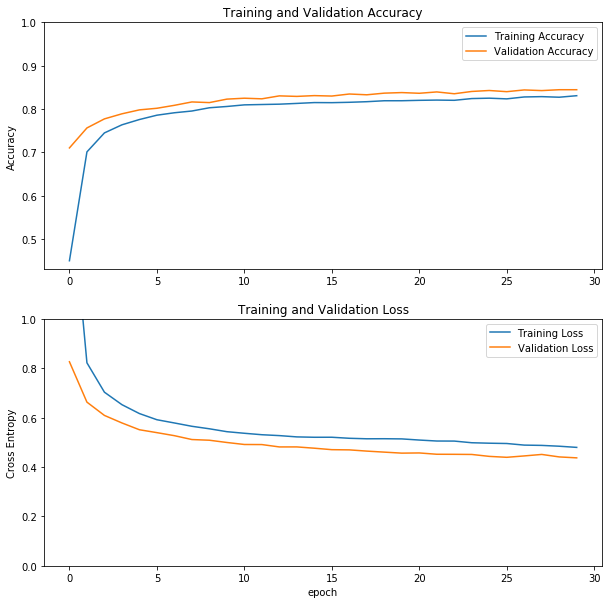

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [34]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 0.4368619833946228
Accuracy: 0.8442
